# Posso 'randomizar' meu experimento por DAC?

### O que é DAC?

### Como o CPF é construído?

### Por que não 'randomizar' por DAC?

In [46]:
import pandas as pd
#Leitura dos relatórios
df = pd.read_csv('report.csv', sep=';')

C:\Users\marco.aragon\AppData\Local\Temp\ipykernel_12928\1021115189.py:3: DtypeWarning: Columns (6,8,42,51,52,58,67,68,69,72,73,79,88,90) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('report.csv', sep=';')


In [47]:
df['Client Document'].nunique()

11974

In [48]:
df['Client Document'].shape[0]

148282

In [49]:
df = df.drop_duplicates(subset='Client Document', keep='first')


In [50]:
df['Client Document'].nunique()

11974

In [51]:
df['Client Document'].shape[0]

11975

In [52]:
df['Client Document'] = df['Client Document'].astype(str).copy()

In [53]:
df['Client Document'] = df['Client Document'].str[:-2]

In [54]:
df['dac'] = df['Client Document'].str[-1]

In [55]:
df = df[['Client Document','dac','UF','City']]

In [56]:
df = df.rename(columns={'Client Document': 'cpf'})

In [57]:
import hashlib

def hash_cpf(cpf):
  return hashlib.sha256(cpf.encode('utf-8')).hexdigest()

df_exemplo = df.copy()
df_exemplo['cpf'] = df['cpf'].apply(hash_cpf)
df_exemplo

,cpf,dac,UF,City
0,ffe32c5db9f03dd1f3a02be3a51c199fa671fc2413cc20...,5,RS,Porto Alegre
5,78a18516092ecf511cec92a2140d34f48ffb90e69524e7...,4,SP,São Paulo
6,3a061f06c82e4a561d016fb702bc65878527341ea538e5...,5,SP,Santa Rita do Passa Quatro
11,2ede84feca0ebee81207a7068be05c10816ace8588f343...,2,SP,São Paulo
12,f648ca71590fc3f66c3b3c8596fbb643d06a4cbbb79b38...,6,SP,Sumaré
...,...,...,...,...
148223,01696122843eb1d565dce5fd03054ce719215b8a5fe105...,2,SP,Santana de Parnaíba
148224,a6ceae7c677b6d08d47d468771d5e13b3b9d2ffbc87859...,7,SP,Santo André
148226,06692619ff3d23d13dd0e8b3b218286c6cb6f539ba9e64...,3,SP,São Paulo
148227,c00fd2e30f646744849ffadaa6b5d66f4caabcc97d610e...,8,MS,Três Lagoas


In [59]:
dac0 = df[df['dac']=='0']
dac1 = df[df['dac']=='1']
dac2 = df[df['dac']=='2']
dac3 = df[df['dac']=='3']
dac4 = df[df['dac']=='4']
dac5 = df[df['dac']=='5']
dac6 = df[df['dac']=='6']
dac7 = df[df['dac']=='7']
dac8 = df[df['dac']=='8']
dac9 = df[df['dac']=='9']

In [60]:
print('quantidade de usuários com dac 0:', dac0.shape[0])
print('quantidade de usuários com dac 1:', dac1.shape[0])
print('quantidade de usuários com dac 2:', dac2.shape[0])
print('quantidade de usuários com dac 3:', dac3.shape[0])
print('quantidade de usuários com dac 4:', dac4.shape[0])
print('quantidade de usuários com dac 5:', dac5.shape[0])
print('quantidade de usuários com dac 6:', dac6.shape[0])
print('quantidade de usuários com dac 7:', dac7.shape[0])
print('quantidade de usuários com dac 8:', dac8.shape[0])
print('quantidade de usuários com dac 9:', dac9.shape[0])

quantidade de usuários com dac 0: 2036
quantidade de usuários com dac 1: 1035
quantidade de usuários com dac 2: 976
quantidade de usuários com dac 3: 1061
quantidade de usuários com dac 4: 1129
quantidade de usuários com dac 5: 1045
quantidade de usuários com dac 6: 1093
quantidade de usuários com dac 7: 1112
quantidade de usuários com dac 8: 1357
quantidade de usuários com dac 9: 1129


In [61]:
print('proporção de usuários com dac 0:', round(dac0.shape[0]/df.shape[0],3))
print('proporção de usuários com dac 1:', round(dac1.shape[0]/df.shape[0],3))
print('proporção de usuários com dac 2:', round(dac2.shape[0]/df.shape[0],3))
print('proporção de usuários com dac 3:', round(dac3.shape[0]/df.shape[0],3))
print('proporção de usuários com dac 4:', round(dac4.shape[0]/df.shape[0],3))
print('proporção de usuários com dac 5:', round(dac5.shape[0]/df.shape[0],3))
print('proporção de usuários com dac 6:', round(dac6.shape[0]/df.shape[0],3))
print('proporção de usuários com dac 7:', round(dac7.shape[0]/df.shape[0],3))
print('proporção de usuários com dac 8:', round(dac8.shape[0]/df.shape[0],3))
print('proporção de usuários com dac 9:', round(dac9.shape[0]/df.shape[0],3))

proporção de usuários com dac 0: 0.17
proporção de usuários com dac 1: 0.086
proporção de usuários com dac 2: 0.082
proporção de usuários com dac 3: 0.089
proporção de usuários com dac 4: 0.094
proporção de usuários com dac 5: 0.087
proporção de usuários com dac 6: 0.091
proporção de usuários com dac 7: 0.093
proporção de usuários com dac 8: 0.113
proporção de usuários com dac 9: 0.094


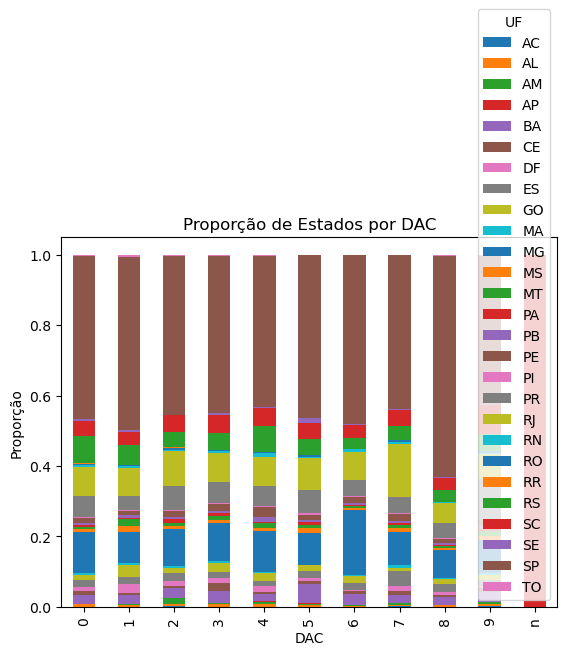

In [62]:
import matplotlib.pyplot as plt

# Agrupando por 'dac' e 'UF' e contando as ocorrências
contagem_por_grupo = df.groupby(['dac', 'UF']).size().reset_index(name='contagem')

# Criando uma tabela pivot
tabela_pivot = contagem_por_grupo.pivot_table(index='dac', columns='UF', values='contagem', fill_value=0)

# Calculando a proporção
tabela_pivot_proporcao = tabela_pivot.div(tabela_pivot.sum(axis=1), axis=0)

# Plotando o gráfico de barras com as proporções
tabela_pivot_proporcao.plot(kind='bar', stacked=True)
plt.title('Proporção de Estados por DAC')
plt.xlabel('DAC')
plt.ylabel('Proporção')
plt.show()

In [63]:
from randomizacao import RandomizacaoBatch
teste_dac = RandomizacaoBatch(123)
teste_dac = teste_dac.executa_randomizacao(df,'cpf')

In [64]:
from scipy.stats import chi2_contingency

# Criando a tabela de contingência
contingency_table = pd.crosstab(df['variante'], df['cpf'])

# Realizando o teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimindo os resultados
print('Qui-quadrado:', chi2)
print('p-valor:', p)
print('Graus de liberdade:', dof)

# Interpretando os resultados
alpha = 0.05
if p < alpha:
    print('Há diferença significativa entre os grupos.')
else:
    print('Não há diferença significativa entre os grupos.')

Qui-quadrado: 11975.0
p-valor: 0.49570356712374225
Graus de liberdade: 11974
Não há diferença significativa entre os grupos.


In [65]:
contagem_sem_dac = teste_dac.groupby('variante').cpf.nunique()
contagem_sem_dac

variante
A    5927
B    6048
Name: cpf, dtype: int64

In [66]:
proporcao = contagem_sem_dac / teste_dac.cpf.nunique()
proporcao

variante
A    0.494948
B    0.505052
Name: cpf, dtype: float64

In [67]:
contagem_sem_dac_estado = df.groupby(['variante', 'UF']).cpf.nunique()

---

In [70]:
dac0['variante'] = 'A - dac0'
dac8['variante'] = 'B - dac8'
dac0e8 = pd.concat([dac0, dac8])

C:\Users\marco.aragon\AppData\Local\Temp\ipykernel_12928\3594533539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dac0['variante'] = 'A - dac0'
C:\Users\marco.aragon\AppData\Local\Temp\ipykernel_12928\3594533539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dac8['variante'] = 'B - dac8'


In [71]:
contagem_dac = dac0e8.groupby('variante').cpf.nunique()

In [72]:
proporcao = contagem_dac / dac0e8.cpf.nunique()
proporcao

variante
A - dac0    0.600059
B - dac8    0.399941
Name: cpf, dtype: float64

In [73]:
contagem_dac_estado = dac0e8.groupby(['variante', 'UF']).cpf.nunique()

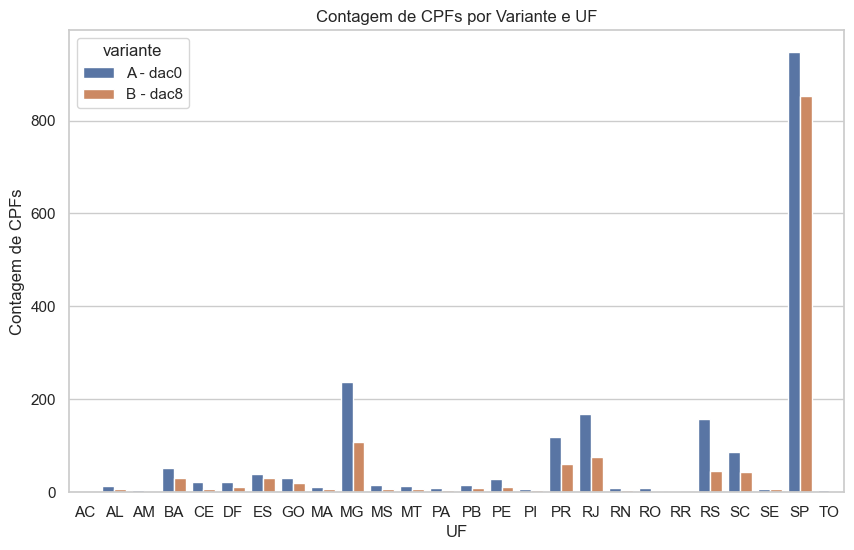

In [74]:
import seaborn as sns

# Personalizando o estilo do gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6)) 

# Criando o gráfico de barras
sns.barplot(x='UF', y='cpf', hue='variante', data=contagem_dac_estado.reset_index())
plt.title('Contagem de CPFs por Variante e UF')
plt.xlabel('UF')
plt.ylabel('Contagem de CPFs')
plt.show()

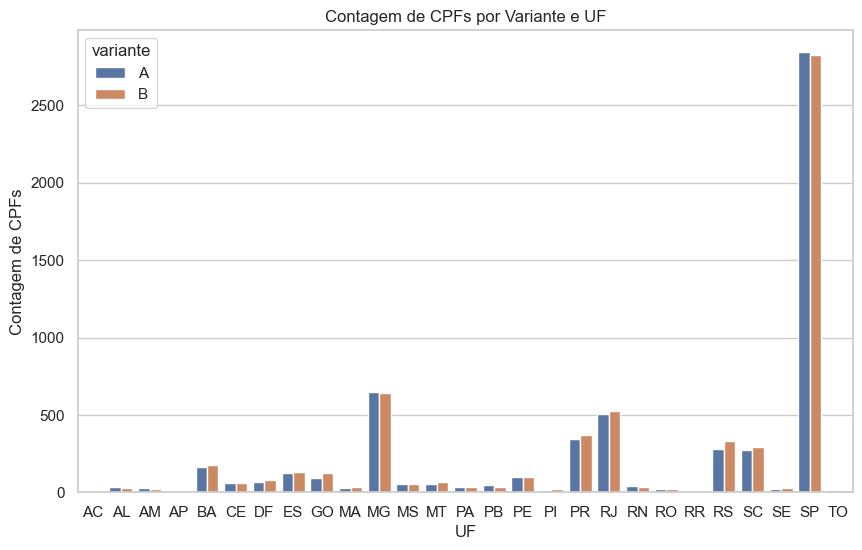

In [28]:
import seaborn as sns

# Personalizando o estilo do gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6)) 

# Criando o gráfico de barras
sns.barplot(x='UF', y='cpf', hue='variante', data=contagem_sem_dac_estado.reset_index())
plt.title('Contagem de CPFs por Variante e UF')
plt.xlabel('UF')
plt.ylabel('Contagem de CPFs')
plt.show()

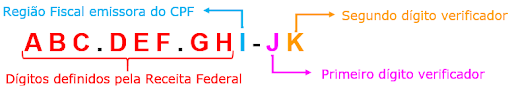

1 --Distrito Federal, Goiás, Mato Grosso, Mato Grosso do Sul e Tocantins;

2 --Pará, Amazonas, Acre, Amapá, Rondônia e Roraima;

3 --Ceará, Maranhão e Piauí;

4 --Pernambuco, Rio Grande do Norte, Paraíba e Alagoas;

5 --Bahia e Sergipe;

6 --Minas Gerais;

7 --Rio de Janeiro e Espírito Santo;

8 --São Paulo;

9 --Paraná e Santa Catarina;

0 --Rio Grande do Sul

Esses dígitos não são aleatórios. Eles são calculados. Vamos mostrar como.Suponha que seu CPF tenha os seguintes nove primeiros dígitos: 983.816.548 (número aleatório, sópara exemplo).Colocamos esses números em uma tabela e multiplicamos da esquerda para a direita pela sequência10, 9, 8, 7, 6, 5, 4, 3, 2.

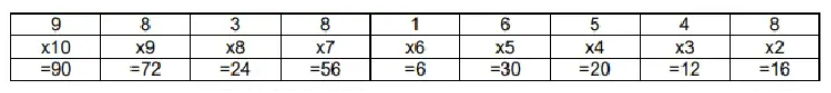

Somamos estes resultados:90+72+24+56+6+30+20+12+16=326 Calculamos agora, o resto da divisão desta soma por 11

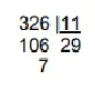

Caso o resto da divisão seja menor que dois (0 ou 1), o dígito J será igual a zero.Para os demais valores (2 a 10), subtraímos o resto obtido de 11 e encontramos o dígito verificadorJ.Nosso caso:11−7 = 4 Nosso CPF já está tomando formato correto: 983.816.548-4KCalculando agora o dígito verificadorK. Colocamos todos os números do CPF, incluindo o primeiro dígito verificador encontrado acima, emuma tabela e multiplicamos da esquerda para a direita pela sequência 11, 10, 9, 8, 7, 6, 5, 4, 3, 2.

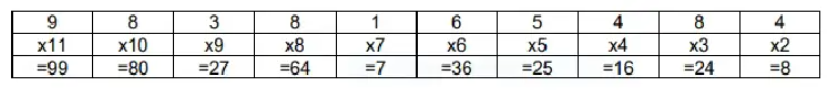

  Fazemos novamente o mesmo cálculo: somamos, dividimos por 11 e consideramos o resto da divisão.99− + 80 + 27 + 64 + 7 + 36 + 25 + 16 + 24 + 8 =386

  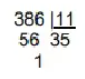

Como o resto da divisão foi um número menor que 2, nosso dígito verificador J será o 0.Se o resto fosse entre 2 e 10 subtrairíamos de 11 para saber qual seria o segundo dígito.Veja nosso CPF como ficou: 983.816.548-40